In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from patsy import dmatrices
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend, figure

### Here you will find: 

- Initial data summary
- Multivariable linear regression assumption test.
- Feature Importance
- MMM with Weekly data.
- Log-log model.

## Data Summary

In [4]:
df = pd.read_csv('CMMMTable.csv')
df.head()

,Date,google BA,google SA,bing BA,bing SA,Revenue
0,2018-01-01,106.52,3.40,NaN,NaN,591.54
1,2018-01-02,126.40,14.25,NaN,NaN,5567.03
2,2018-01-03,115.64,12.62,NaN,NaN,3780.76
3,2018-01-04,117.82,13.31,NaN,NaN,5251.87
4,2018-01-05,119.31,9.79,NaN,NaN,2554.60


In [5]:
# Load the model data
df = pd.read_csv('CMMMTable.csv',dtype={
    'Revenue': np.float64,
    'google BA': np.float64,
    'google SA': np.float64,
    'bing BA': np.float64,
    'bing BA': np.float64,
}, parse_dates=['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df['WeekNumber'] = pd.DatetimeIndex(df['Date']).week
df.head()

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39447/734444806.py:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekNumber'] = pd.DatetimeIndex(df['Date']).week


,Date,google BA,google SA,bing BA,bing SA,Revenue,Year,Month,Year_Month,WeekNumber
0,2018-01-01,106.52,3.40,NaN,NaN,591.54,2018,1,2018-1,1
1,2018-01-02,126.40,14.25,NaN,NaN,5567.03,2018,1,2018-1,1
2,2018-01-03,115.64,12.62,NaN,NaN,3780.76,2018,1,2018-1,1
3,2018-01-04,117.82,13.31,NaN,NaN,5251.87,2018,1,2018-1,1
4,2018-01-05,119.31,9.79,NaN,NaN,2554.60,2018,1,2018-1,1


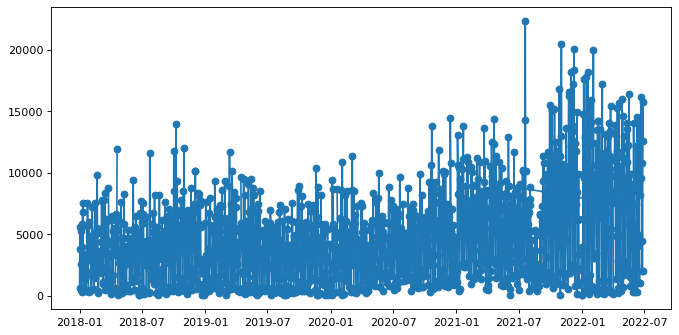

In [6]:
figure(figsize=(10, 5), dpi=80)
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.show()

## Data Quality and Analysis

### NaN Values

In [8]:
df[df != 0.0].drop('Year_Month', 1).isna().groupby(df.Year_Month, sort=False).sum().reset_index()

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39447/742069122.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df[df != 0.0].drop('Year_Month', 1).isna().groupby(df.Year_Month, sort=False).sum().reset_index()


,Year_Month,Date,google BA,google SA,bing BA,bing SA,Revenue,Year,Month,WeekNumber
0,2018-1,0,0,0,31,31,1,0,0,0
1,2018-2,0,0,0,28,28,0,0,0,0
2,2018-3,0,0,0,31,31,2,0,0,0
3,2018-4,0,0,0,30,30,2,0,0,0
4,2018-5,0,0,0,31,31,4,0,0,0
5,2018-6,0,0,0,30,30,1,0,0,0
6,2018-7,0,0,0,31,31,1,0,0,0
7,2018-8,0,0,0,31,31,1,0,0,0
8,2018-9,0,0,0,30,30,1,0,0,0
9,2018-10,0,0,0,31,31,0,0,0,0


In [9]:
df = df.fillna(0)
df.head()

,Date,google BA,google SA,bing BA,bing SA,Revenue,Year,Month,Year_Month,WeekNumber
0,2018-01-01,106.52,3.40,0.0,0.0,591.54,2018,1,2018-1,1
1,2018-01-02,126.40,14.25,0.0,0.0,5567.03,2018,1,2018-1,1
2,2018-01-03,115.64,12.62,0.0,0.0,3780.76,2018,1,2018-1,1
3,2018-01-04,117.82,13.31,0.0,0.0,5251.87,2018,1,2018-1,1
4,2018-01-05,119.31,9.79,0.0,0.0,2554.60,2018,1,2018-1,1


## Revenue Behaviour

In [10]:
df[['Revenue', 'Year']].groupby('Year').describe()

Revenue                                                                  \
       count         mean          std  min        25%       50%         75%   
Year                                                                           
2018   365.0  3576.070219  2714.120923  0.0   977.9400  3434.520   5517.0600   
2019   365.0  3568.470685  2547.485519  0.0  1123.0200  3621.540   5295.5400   
2020   366.0  4032.092623  2742.844661  0.0  1579.9625  3771.275   5794.0750   
2021   365.0  6043.986877  4233.320288  0.0  2342.6700  5698.780   8732.3100   
2022   180.0  7551.185000  5263.526752  0.0  2037.5750  8116.240  11620.9925   

                
           max  
Year            
2018  13914.95  
2019  11652.46  
2020  14397.60  
2021  22322.28  
2022  19928.24

In [11]:
df[['Revenue', 'Year']].groupby('Year').agg(['sum'])

,Revenue
,sum
Year,
2018,1305265.63
2019,1302491.80
2020,1475745.90
2021,2206055.21
2022,1359213.30


<AxesSubplot:title={'center':'Revenue'}, xlabel='[Year]'>

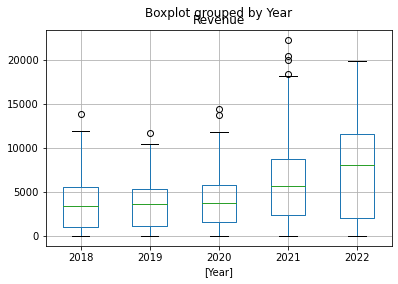

In [12]:
df[['Revenue', 'Year']].boxplot(by='Year')

Conclusion

* 2020 because of covid has a lot of nuisance variables that we cannot account for
* 2022 we don't have enough data.

Focus the analysis on 2021 data for now and see how later how the model holds in other periods

### From this point forward just information from 2021 will be described

We are accounting for too few variables in the MMM model. By using 2021 data only, we want to reduce the risk of observation external behavior not related to variables that we can measure/control.

In [13]:
df_2021=df[df['Year']==2021].sort_values("Date").reset_index(drop=True)
df_2021.head()

,Date,google BA,google SA,bing BA,bing SA,Revenue,Year,Month,Year_Month,WeekNumber
0,2021-01-01,22.90,105.62,8.11,2.37,1808.93,2021,1,2021-1,53
1,2021-01-02,19.51,120.23,4.25,3.88,2013.23,2021,1,2021-1,53
2,2021-01-03,22.45,116.12,9.07,7.57,1074.74,2021,1,2021-1,53
3,2021-01-04,49.91,244.64,20.58,13.47,13093.96,2021,1,2021-1,1
4,2021-01-05,38.97,263.38,18.99,11.65,10602.44,2021,1,2021-1,1


## Investment and Revenue Behaviour

In [14]:
df_2021[["google BA","google SA","bing BA","bing SA"]].agg(['sum'])

,google BA,google SA,bing BA,bing SA
sum,15390.73,88221.75,33156.54,3254.83


### Variable Correlations

In [19]:
corr = df_2021[["google BA","google SA","bing BA","bing SA"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39447/3520894379.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,google BA,google SA,bing BA,bing SA
google BA,1.00,0.54,-0.03,0.56
google SA,0.54,1.00,-0.01,0.45
bing BA,-0.03,-0.01,1.00,-0.09
bing SA,0.56,0.45,-0.09,1.00


In [20]:
pca = PCA()
pca.fit(df_2021[["google BA","google SA","bing BA","bing SA"]])
pca.explained_variance_ratio_ 

array([9.83676595e-01, 1.59394133e-02, 3.59603691e-04, 2.43884340e-05])

## Feature Importance

In [21]:
df_2021.isnull().any()

Date          False
google BA     False
google SA     False
bing BA       False
bing SA       False
Revenue       False
Year          False
Month         False
Year_Month    False
WeekNumber    False
dtype: bool

<AxesSubplot:>

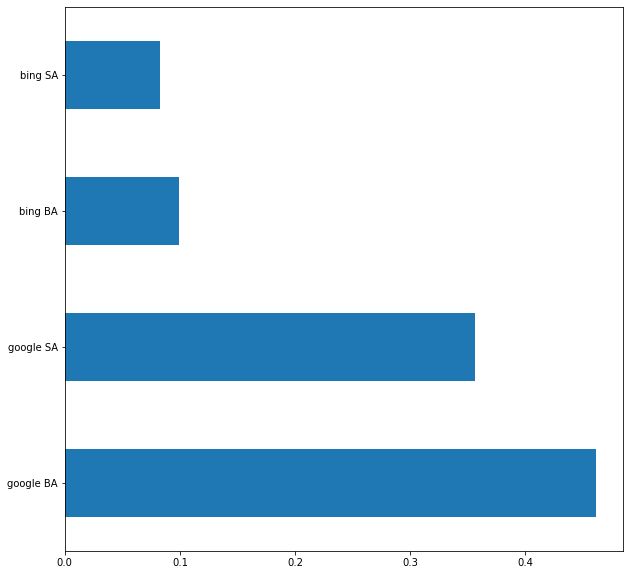

In [22]:
df_fi = df_2021.drop(['Date','Year','Month','Year_Month','WeekNumber'], axis=1)
X = df_fi.loc[:, df_fi.columns != 'Revenue']
y = df_fi['Revenue']
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [24]:
df[["google BA","google SA","bing BA","bing SA"]].agg(['sum'])

,google BA,google SA,bing BA,bing SA
sum,153666.3,207596.93,38000.4,11830.67


In [34]:
df[['Revenue','Year',"google BA","google SA","bing BA","bing SA"]].groupby('Year').agg(['sum'])

,Revenue,google BA,google SA,bing BA,bing SA
,sum,sum,sum,sum,sum
Year,,,,,
2018,1305265.63,55946.14,5740.91,0.00,0.00
2019,1302491.80,65649.78,9023.69,117.55,2569.42
2020,1475745.90,9184.87,56532.68,2161.78,3390.64
2021,2206055.21,15390.73,88221.75,33156.54,3254.83
2022,1359213.30,7494.78,48077.90,2564.53,2615.78


Both Google streams have had significantly more funding for longer periods of time. This is reflected in their feature
importance scores and shows them to both be effective marketing channels. 
Whilst both Bing channels have not been receving funding for as long. This could be a factor causing the lesser 
feature importance values - as we have not yet seen the full adstock effect. 

### Normality Tets

In [27]:
from scipy.stats import normaltest
for column in ["google BA","google SA","bing BA","bing SA","Revenue"]:
    print("{}: {}".format(column, normaltest(df_2021[column])))

google BA: NormaltestResult(statistic=17.02539554277358, pvalue=0.0002009011079176548)
google SA: NormaltestResult(statistic=36.02771614323807, pvalue=1.502037729198923e-08)
bing BA: NormaltestResult(statistic=728.2099621696209, pvalue=7.433885735598251e-159)
bing SA: NormaltestResult(statistic=22.023025741205597, pvalue=1.6510518908034498e-05)
Revenue: NormaltestResult(statistic=31.91102752839044, pvalue=1.1765446579378521e-07)


### Regression Fit 

In [28]:
df_2021 = df_2021.rename(columns={
    "google BA":'gBA', 'google SA':'gSA', 'bing BA': "bBA", 'bing SA': "bSA"
})

### Daily Regressions

In [30]:
lm_day_model = sm.ols(formula="Revenue~gBA+"
                          "gSA+"
                          "bBA+"
                          "bSA", data=df_2021).fit()
print(lm_day_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.60e-62
Time:                        12:38:46   Log-Likelihood:                -3417.3
No. Observations:                 365   AIC:                             6845.
Df Residuals:                     360   BIC:                             6864.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.5200    318.112      0.316      0.7

### Multicollinearity Test

In [31]:
y, X = dmatrices("Revenue~gBA+gSA+bBA+bSA", df.rename(columns={
        "google BA":'gBA', 'google SA':'gSA', 'bing BA': "bBA", "bing SA": "bSA"
}), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,5.158073,Intercept
1,1.270576,gBA
2,1.580345,gSA
3,1.003411,bBA
4,1.344134,bSA


VIF starts at 1 and has no upper limit VIF = 1, no correlation between the independent variable and the other variables VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

### Predictions for the Weekly Model

Transforming 2021 data to be Weekly:

In [52]:
df_week=df[['Revenue', 'gBA','gSA','bBA','bSA', 'WeekNumber']]
df_week=df_week[df_week['WeekNumber'] < 52].groupby('WeekNumber').agg([sum])
df_week =  df_week[['Revenue', 'gBA','gSA','bBA','bSA']].reset_index(drop=True).T.reset_index(drop=True).T.rename(columns={
    0: 'Revenue',
    1: 'gBA',
    2: 'gSA',
    3: 'bBA',
    4: 'bSA',
})
df_week['WeekNumber']=df[df['WeekNumber'] < 52].groupby('WeekNumber').count().reset_index()['WeekNumber']
df_week.tail()

,Revenue,gBA,gSA,bBA,bSA,WeekNumber
46,105213.03,500.32,3837.06,157.70,179.77,47
47,108179.16,517.89,4663.55,154.11,198.25,48
48,116067.26,526.48,4189.46,163.01,174.79,49
49,86624.22,534.14,3319.85,142.12,171.42,50
50,71873.11,504.10,2258.60,109.62,105.63,51


Transforming 2022 data to be Weekly:

In [53]:
df_2022_week=df_2022[['Revenue', 'gBA','gSA','bBA','bSA','WeekNumber']]
df_2022_week=df_2022_week[df_2022_week['WeekNumber'] < 52].groupby('WeekNumber').agg([sum])
df_2022_week =  df_2022_week[['Revenue', 'gBA','gSA','bBA','bSA']].reset_index(drop=True).T.reset_index(drop=True).T.rename(columns={
    0: 'Revenue',
    1: 'gBA',
    2: 'gSA',
    3: 'bBA',
    4: 'bSA',
})
df_2022_week['WeekNumber']=df_2022[df_2022['WeekNumber'] < 52].groupby('WeekNumber').count().reset_index()['WeekNumber']
df_2022_week.head()

,Revenue,gBA,gSA,bBA,bSA,WeekNumber
0,51190.71,262.59,1376.98,60.60,46.41,1
1,67217.63,213.37,1935.16,83.67,154.07,2
2,65362.31,236.77,2108.32,101.01,147.30,3
3,58607.83,352.93,2442.07,110.57,172.00,4
4,64589.70,387.55,2881.49,172.12,180.38,5


## Fitting the model

In [54]:
lm_week_model = sm.ols(formula="Revenue~gBA+"
                          "gSA+"
                          "bBA+"
                          "bSA", data=df_week).fit()
print(lm_week_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     27.04
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.42e-11
Time:                        18:58:57   Log-Likelihood:                -535.50
No. Observations:                  51   AIC:                             1081.
Df Residuals:                      46   BIC:                             1091.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    376.0587   7024.480      0.054      0.9

In [55]:
y, X = dmatrices("Revenue~gBA+gSA+bBA+bSA", df_week, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,29.394958,Intercept
1,1.114410,gBA
2,1.064589,gSA
3,1.008329,bBA
4,1.059520,bSA


### Predicting 2020/21 Weekly

In [57]:
predictions_weekly = pd.DataFrame({
    'Predictions':lm_week_model.predict(df_week[['gBA','gSA','bBA','bSA']]),
    'Revenue': df_week['Revenue'],
    'WeekNumber': df_week['WeekNumber']
})
predictions_weekly['ErrorAbs'] = abs(predictions_weekly['Predictions'] - predictions_weekly['Revenue'])
predictions_weekly.head()

,Predictions,Revenue,WeekNumber,ErrorAbs
0,56497.041014,58334.86,1,1837.818986
1,71215.586728,77532.74,2,6317.153272
2,84979.337956,71344.16,3,13635.177956
3,68974.372791,58306.18,4,10668.192791
4,72778.106064,73881.04,5,1102.933936


In [58]:
mse(predictions_weekly['Predictions'], predictions_weekly['Revenue'])

77217066.9931807

In [59]:
mape(predictions_weekly['Predictions'], predictions_weekly['Revenue'])

0.10166093605134316

In [60]:
np.mean(predictions_weekly['ErrorAbs'])

6826.725719487666

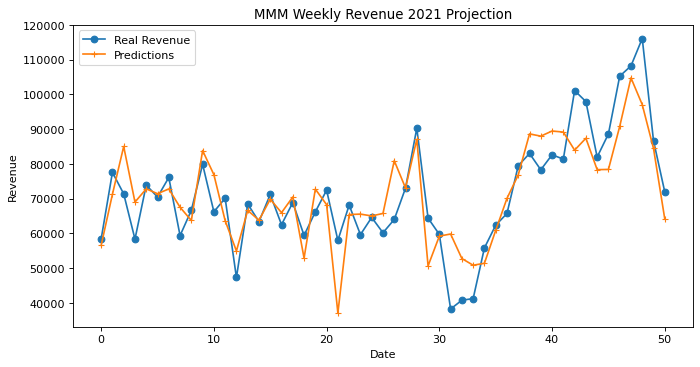

In [61]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_weekly["Revenue"], marker='o')
plt.plot(predictions_weekly["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Weekly Revenue 2021 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

# 2022 Weekly Prediction

In [62]:
predictions_weekly = pd.DataFrame({
    'Predictions':lm_week_model.predict(df_2022_week[['gBA','gSA','bBA','bSA']]),
    'Revenue': df_2022_week['Revenue'],
    'WeekNumber': df_2022_week['WeekNumber']
})
predictions_weekly['ErrorAbs'] = abs(predictions_weekly['Predictions'] - predictions_weekly['Revenue'])
predictions_weekly.head()

,Predictions,Revenue,WeekNumber,ErrorAbs
0,36107.339301,51190.71,1,15083.370699
1,47020.486496,67217.63,2,20197.143504
2,50425.362811,65362.31,3,14936.947189
3,62364.199146,58607.83,4,3756.369146
4,70973.223284,64589.70,5,6383.523284


In [63]:
predictions_weekly.to_csv('C_Weekly_2022_predvact.csv')

In [64]:
mse(predictions_weekly['Predictions'], predictions_weekly['Revenue'])

160770732.12958568

In [65]:
mape(predictions_weekly['Predictions'], predictions_weekly['Revenue'])

0.2663521267037497

In [66]:
np.mean(predictions_weekly['ErrorAbs'])

10189.038035897913

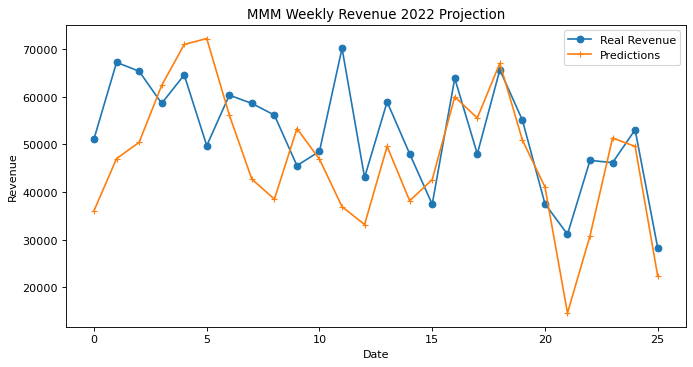

In [67]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_weekly["Revenue"], marker='o')
plt.plot(predictions_weekly["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Weekly Revenue 2022 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

## Log Log Modelling

In [68]:
def transform_log(x):
    if x == 0:
        x += 0.000001
    return math.log(x)

df_log = df_week.rename(columns={
            "google BA":'gBA', 'google SA':'gSA', 'bing BA': "bBA", "bing SA": "bSA"

})
for column in ['gBA','gSA','bBA','bSA',"Revenue"]:
    df_log['{}Log'.format(column)] = df_log[column].apply(lambda x: transform_log(x))

In [69]:
log_model = sm.ols(formula="RevenueLog~gBALog+gSALog+bBALog+bSALog", data=df_log).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:             RevenueLog   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     18.31
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.64e-09
Time:                        19:05:34   Log-Likelihood:                 27.353
No. Observations:                  51   AIC:                            -44.71
Df Residuals:                      46   BIC:                            -35.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1611      0.850      4.894      0.0